# 1. Introduction to part 3 of the lab

## 1.1 CMIP6 data

In this part of the exercises, you will be working with output data from CMIP6. 

### 1.1.1. What is CMIP6
CMIP6 refers to the Sixth Phase of the Coupled Model Intercomparison Project. It is a framework for coordinating and promoting the systematic evaluation of Earth System Models (ESMs) and their components. 
Basically all modelling groups who develop ESMs do the same simulations with the same input (forcing!), and then we compare the results. 



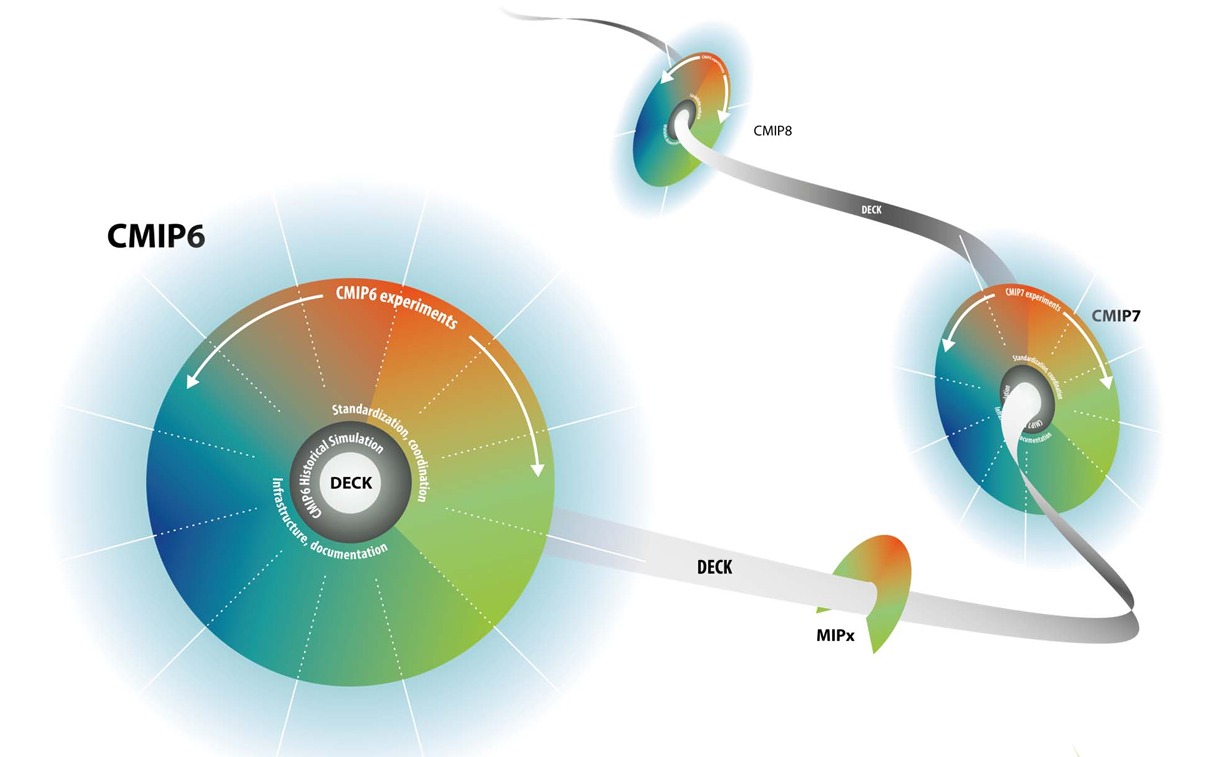

Source:https://www.wcrp-climate.org/wgcm-cmip/wgcm-cmip6


- Project under World Climate Research Programme (WCRP) 
- Since 1995 CMIP has coordinated climate model experiments 
- Defines common experiment protocols, forcings and output. 
- More than 30 model groups participate'



- GMD special issue with articles explaining all MIPs in CMIP6 :
https://www.geosci-model-dev.net/special_issue590.html
- General CMIP6 website https://www.wcrp-climate.org/wgcm-cmip/wgcm-cmip6
- Guidance documents: (https://pcmdi.llnl.gov/CMIP6/)
- Emissions/Forcing datasets (https://esgf-node.llnl.gov/projects/input4mips/)
- Model and experiment documentation (https://search.es-doc.org/)
- Emission visualising: https://eccad.aeris-data.fr

### 1.1.2. What's so great about CMIP?
- All data is open and free to use
- Homogenized and standardized outputs
- Same variable name
- Same experiments

### 1.1.3. Experiments (DECK)
The core of CMIP6 are the DECK experiments, which stands for Diagnostic, Evaluation and Characterization of Klima. 
The core experiments are listed in the table below. 

<img src="https://user-images.githubusercontent.com/17406708/139691209-ec237004-637b-4947-bb12-104d78a2fe44.png" alt="drawing" width="800"/>


Each experiment has a purpose. In this exercise we will primarily look at the **historical simulations**, which are often used to evaluate the models and their performancs. In these simulations, we try to feed the models emissions and forcing as close to reality as possible. 

## 1.2 Coding 
You will mostly be given the the code needed to read the data, and will mainly do the plotting on your own. It might though, be good to know that we are mainly using a python package called **xarray** to read and do calculations on the dataset. [Xarray](https://xarray.dev/) is excellent for dealing with multidimensional datasets (like latitude, longitude, time, height) and is very similar (and built on) [Pandas](https://pandas.pydata.org/) for those who might know it. Some introduction follows below. 

## 1.3 File format: NetCDF

A netCDF (Network Common Data Form) file is a self-describing, machine-independent data format commonly used in scientific communities, especially in Earth and atmospheric sciences. It stores multi-dimensional arrays of scientific data (e.g., variables such as temperature, pressure, or precipitation) along with metadata that describes the data (e.g., units, spatial and temporal coordinates, variable names, etc.).

NetCDF files are designed to be easily accessible and usable by a wide range of software programs, including specialized scientific software and general-purpose data analysis tools. This makes netCDF a convenient format for sharing and exchanging scientific data, and it is widely used in many fields, including climate science, atmospheric science, oceanography, and others. The netCDF format is maintained by the Unidata Program at the University Corporation for Atmospheric Research (UCAR).

## 1.4 ACTION POINT: 

###  Download the data to your computer

The data you need is all collected here: https://stockholmuniversity.box.com/s/y2gm2knry1z1qz0ju9h3qa48l2l2rlge
Put all the data in the Data folder. You can now read the data e.g. by:
```python
ds_noresm = xr.open_dataset('Data/CMIP.NCC.NorESM2-LM.historical.Amon.gn.nc')
ds_cesm = xr.open_dataset('Data/CMIP.NCAR.CESM2-WACCM.historical.Amon.gn.nc')
```
This is a relative path, meaning Python searches for the Data folder (and the file inside it) starting from the directory where the notebook is saved.

## 1.5 Some coding introduction: Xarray++

### 1.5.1 How to open a netcdf file
In this exercise you will be given code which reads the data directly from the database, but in general to read a netcdf file in xarray, you can run:

```python
import xarray as xr
ds = xr.open_dataset('path/to/netcdf/file.nc')
```


Let's open the HadCRUT dataset (more on this below), which is a historical dataset. We are dropping some variables for simplicity here (`drop_variables=['time_bnds','latitude_bnds','longitude_bnds','realization_bnds']`).

In [16]:
import xarray as xr

In [17]:
ds_hadcrut = xr.open_dataset('Data/HadCRUT.5.0.1.0.analysis.anomalies.ensemble_mean.nc', 
                             drop_variables=['time_bnds','latitude_bnds','longitude_bnds','realization_bnds'])

Simply running the following line will give you a html interface to have a look at the data, which contains both metadata (information about the data), variables and coordinates.

In [19]:
ds_hadcrut

<xarray.Dataset> Size: 43MB
Dimensions:      (time: 2076, latitude: 36, longitude: 72)
Coordinates:
  * time         (time) datetime64[ns] 17kB 1850-01-16T12:00:00 ... 2022-12-1...
  * latitude     (latitude) float64 288B -87.5 -82.5 -77.5 ... 77.5 82.5 87.5
  * longitude    (longitude) float64 576B -177.5 -172.5 -167.5 ... 172.5 177.5
    realization  int64 8B ...
Data variables:
    tas_mean     (time, latitude, longitude) float64 43MB ...
Attributes:
    comment:      2m air temperature over land blended with sea water tempera...
    history:      Data set built at: 2023-01-10T22:32:59+00:00
    institution:  Met Office Hadley Centre / Climatic Research Unit, Universi...
    licence:      HadCRUT5 is licensed under the Open Government Licence v3.0...
    reference:    C. P. Morice, J. J. Kennedy, N. A. Rayner, J. P. Winn, E. H...
    source:       CRUTEM.5.0.1.0 HadSST.4.0.0.0
    title:        HadCRUT.5.0.1.0 blended land air temperature and sea-surfac...
    version:      HadCRUT.5.0.1.0
    Conventions:  CF-1.7

### 1.5.2. Averaging: 
When we have a multidimensional dataset, averaging can be done over one, or many dimensions. For example, we might want to average over latitude and longitude:

In [21]:
ds_mean = ds_hadcrut.mean(dim = ['latitude','longitude']) # Notice how the names in brackets correspond to the coordinate names in the file

**(There is a problem with the way the global average is calculated above, can you spot it? )**

Notice how the resulting dataset only contains time as a dimension? (And bnds, but we will not look at this) 

In [24]:
ds_mean

<xarray.Dataset> Size: 33kB
Dimensions:      (time: 2076)
Coordinates:
  * time         (time) datetime64[ns] 17kB 1850-01-16T12:00:00 ... 2022-12-1...
    realization  int64 8B ...
Data variables:
    tas_mean     (time) float64 17kB -0.9086 -0.2955 -0.6202 ... 0.7283 0.948
Attributes:
    comment:      2m air temperature over land blended with sea water tempera...
    history:      Data set built at: 2023-01-10T22:32:59+00:00
    institution:  Met Office Hadley Centre / Climatic Research Unit, Universi...
    licence:      HadCRUT5 is licensed under the Open Government Licence v3.0...
    reference:    C. P. Morice, J. J. Kennedy, N. A. Rayner, J. P. Winn, E. H...
    source:       CRUTEM.5.0.1.0 HadSST.4.0.0.0
    title:        HadCRUT.5.0.1.0 blended land air temperature and sea-surfac...
    version:      HadCRUT.5.0.1.0
    Conventions:  CF-1.7

### 1.5.3. Very quick plotting:

When you want to look at a specific variable in a dataset, you write 
```python
ds['name_of_variable']
```
followed by whatever operation you want to perform on that variable. This is analogous to pandas.  

**Let's try to plot a variable: tas or temperature at surface:**

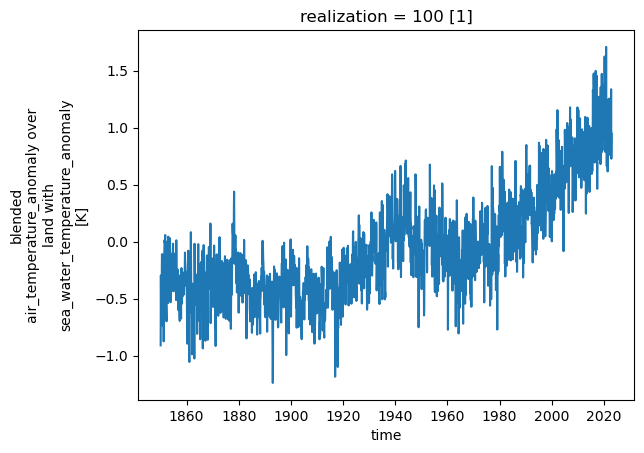

In [28]:
ds_mean['tas_mean'].plot()

Now we can **adjust the plot by including other setting**:
We add these as arguments to the plot function.

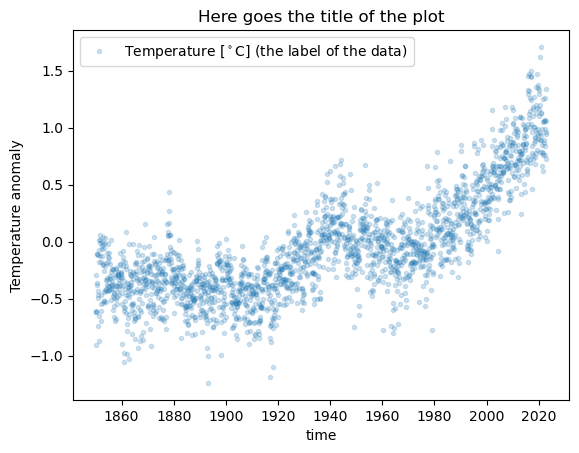

In [30]:
import matplotlib.pyplot as plt 

ds_mean['tas_mean'].plot(
    marker='.',  # makes dots for eacch datapoint
    linewidth=0, # removes the line between the datapoints
    alpha = .2,  # makes the datapoints sea-through (lower alpha, more see through)
    label=r'Temperature [$^\circ$C] (the label of the data)', # Changes the label of the data
)
plt.title('Here goes the title of the plot') # Adds title
plt.ylabel('Temperature anomaly') # label on the y axis
plt.legend() # makes the plocct legend appear

### 1.5.4. Resample and rolling: make yearly averages and rolling averages

Notice how the data above is very noisy? Often in climate data, we want to look at yearly or decadal averages or do a rolling average. 


The method 'resample' will group the data in periods in time. You can use it like this (the 'Y' stands for year, if you want other periods, you could do 'D' for day, 'M' for month', or '10Y' for 10 years):

Notice how the resample is followed by .mean()? The function added after resampel will be performed on the groups in question. In this case it results in yearly mean values. Let's now add the yearly mean values to the plot

In [35]:
ds_yearly = ds_mean.resample(time='YE').mean()

(**NB: If you get an error above, change `'YE'` to `'Y'`. It depends on your version of python.)

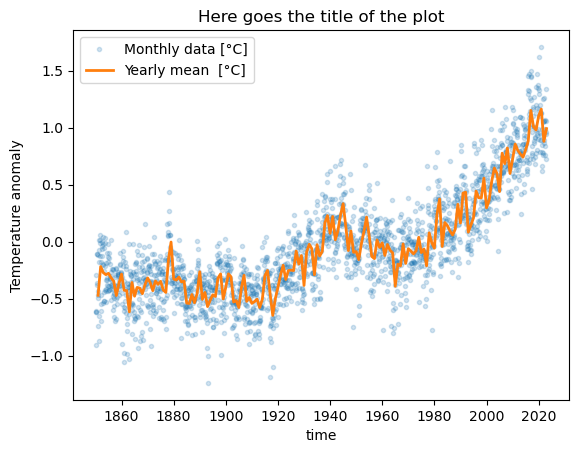

In [37]:
import matplotlib.pyplot as plt 

ds_mean['tas_mean'].plot(
    marker='.',  # makes dots for eacch datapoint
    linewidth=0, # removes the line between the datapoints
    alpha = .2,  # makes the datapoints sea-through (lower alpha, more see through)
    label='Monthly data [°C]',
)

ds_yearly['tas_mean'].plot(
    # marker='.',  # makes dots for eacch datapoint
    linewidth=2, # removes the line between the datapoints
    alpha = 1,  # makes the datapoints sea-through (lower alpha, more see through)
    label='Yearly mean  [°C]',
)
plt.title('Here goes the title of the plot')
plt.ylabel('Temperature anomaly') # label on the y axis
plt.legend() # makes the plot legend appear

Finally let's do a 10 year rolling mean: 



In [39]:
ds_rolling = ds_yearly.rolling(
    time = 10, # number of points in rolling window
    center= True # sets the new time label in the midle of the window
).mean() # this is the operation performed on the rolling window

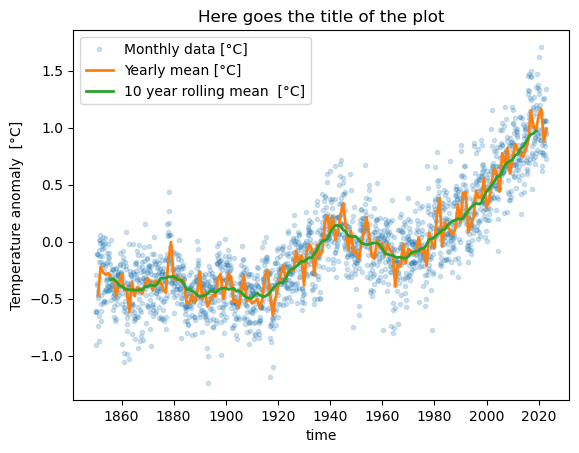

In [40]:
import matplotlib.pyplot as plt 

ds_mean['tas_mean'].plot(
    marker='.',  # makes dots for eacch datapoint
    linewidth=0, # removes the line between the datapoints
    alpha = .2,  # makes the datapoints sea-through (lower alpha, more see through)
    label='Monthly data [°C]',
)

ds_yearly['tas_mean'].plot(
    # marker='.',  # makes dots for eacch datapoint
    linewidth=2, # removes the line between the datapoints
    alpha = 1,  # makes the datapoints sea-through (lower alpha, more see through)
    label='Yearly mean [°C]',
)


ds_rolling['tas_mean'].plot(
    # marker='.',  # makes dots for eacch datapoint
    linewidth=2, # removes the line between the datapoints
    alpha = 1,  # makes the datapoints sea-through (lower alpha, more see through)
    label='10 year rolling mean  [°C]',
)

plt.title('Here goes the title of the plot')
plt.ylabel('Temperature anomaly  [°C]') # label on the y axis
plt.legend() # makes the plot legend appear

### 1.5.5. Selecting subsets of the data

Sometimes we might want to look at a particular period for example, or just one day. In xarray we use .sel (for select) or .isel (index-select) for this. 

The syntax is as follows:
```python
ds.sel(coordinate_name='value_we_want')
```
or if you just want the first, second etc. one, you can use index:
```python
ds.isel(coordinate_name=0)
```


In [42]:
ds_mean.sel(time='1900-01')


<xarray.Dataset> Size: 24B
Dimensions:      (time: 1)
Coordinates:
  * time         (time) datetime64[ns] 8B 1900-01-16T12:00:00
    realization  int64 8B ...
Data variables:
    tas_mean     (time) float64 8B -0.657
Attributes:
    comment:      2m air temperature over land blended with sea water tempera...
    history:      Data set built at: 2023-01-10T22:32:59+00:00
    institution:  Met Office Hadley Centre / Climatic Research Unit, Universi...
    licence:      HadCRUT5 is licensed under the Open Government Licence v3.0...
    reference:    C. P. Morice, J. J. Kennedy, N. A. Rayner, J. P. Winn, E. H...
    source:       CRUTEM.5.0.1.0 HadSST.4.0.0.0
    title:        HadCRUT.5.0.1.0 blended land air temperature and sea-surfac...
    version:      HadCRUT.5.0.1.0
    Conventions:  CF-1.7

In [43]:
ds_mean.isel(time=0)


<xarray.Dataset> Size: 24B
Dimensions:      ()
Coordinates:
    time         datetime64[ns] 8B 1850-01-16T12:00:00
    realization  int64 8B ...
Data variables:
    tas_mean     float64 8B -0.9086
Attributes:
    comment:      2m air temperature over land blended with sea water tempera...
    history:      Data set built at: 2023-01-10T22:32:59+00:00
    institution:  Met Office Hadley Centre / Climatic Research Unit, Universi...
    licence:      HadCRUT5 is licensed under the Open Government Licence v3.0...
    reference:    C. P. Morice, J. J. Kennedy, N. A. Rayner, J. P. Winn, E. H...
    source:       CRUTEM.5.0.1.0 HadSST.4.0.0.0
    title:        HadCRUT.5.0.1.0 blended land air temperature and sea-surfac...
    version:      HadCRUT.5.0.1.0
    Conventions:  CF-1.7

To select a period, we can use slice like this:


In [45]:
ds_mean.sel(time=slice('1900-01-01','1905-01-01'))

<xarray.Dataset> Size: 968B
Dimensions:      (time: 60)
Coordinates:
  * time         (time) datetime64[ns] 480B 1900-01-16T12:00:00 ... 1904-12-1...
    realization  int64 8B ...
Data variables:
    tas_mean     (time) float64 480B -0.657 -0.3354 -0.1803 ... -0.3616 -0.5373
Attributes:
    comment:      2m air temperature over land blended with sea water tempera...
    history:      Data set built at: 2023-01-10T22:32:59+00:00
    institution:  Met Office Hadley Centre / Climatic Research Unit, Universi...
    licence:      HadCRUT5 is licensed under the Open Government Licence v3.0...
    reference:    C. P. Morice, J. J. Kennedy, N. A. Rayner, J. P. Winn, E. H...
    source:       CRUTEM.5.0.1.0 HadSST.4.0.0.0
    title:        HadCRUT.5.0.1.0 blended land air temperature and sea-surfac...
    version:      HadCRUT.5.0.1.0
    Conventions:  CF-1.7

# 2. Read in the CMIP6 data 

In [47]:
ds_noresm = xr.open_dataset('Data/CMIP.NCC.NorESM2-LM.historical.Amon.gn.nc')
ds_cesm = xr.open_dataset('Data/CMIP.NCAR.CESM2-WACCM.historical.Amon.gn.nc')

# 3. Look at the two  datasets

We have just loaded temperature records for two CMIP models: NorESM and CESM. 
Notive that there is a coordinate called "member_id". This if for different ensamble members. More on this later. 

In [50]:
ds_cesm

<xarray.Dataset> Size: 1GB
Dimensions:    (member_id: 3, time: 1980, lat: 192, lon: 288)
Coordinates:
  * member_id  (member_id) <U8 96B 'r2i1p1f1' 'r3i1p1f1' 'r1i1p1f1'
  * time       (time) datetime64[ns] 16kB 1850-01-15T12:00:00 ... 2014-12-15T...
  * lat        (lat) float64 2kB -90.0 -89.06 -88.12 -87.17 ... 88.12 89.06 90.0
  * lon        (lon) float64 2kB 0.0 1.25 2.5 3.75 ... 355.0 356.2 357.5 358.8
Data variables:
    tas        (member_id, time, lat, lon) float32 1GB ...
Attributes: (12/49)
    branch_time_in_parent:   20075.0
    mip_era:                 CMIP6
    external_variables:      areacella
    table_id:                Amon
    product:                 model-output
    further_info_url:        https://furtherinfo.es-doc.org/CMIP6.NCAR.CESM2-...
    ...                      ...
    realm:                   atmos
    grid_label:              gn
    branch_method:           standard
    realization_index:       1
    tracking_id:             hdl:21.14100/3ee6052c-4da8-4486-9228-e91943a379f...
    intake_esm_dataset_key:  CMIP.NCAR.CESM2-WACCM.historical.Amon.gn

In [51]:
ds_noresm

<xarray.Dataset> Size: 328MB
Dimensions:    (member_id: 3, time: 1980, lat: 96, lon: 144)
Coordinates:
  * member_id  (member_id) <U8 96B 'r1i1p1f1' 'r3i1p1f1' 'r2i1p1f1'
  * time       (time) datetime64[ns] 16kB 1850-01-16T12:00:00 ... 2014-12-16T...
  * lat        (lat) float64 768B -90.0 -88.11 -86.21 ... 86.21 88.11 90.0
  * lon        (lon) float64 1kB 0.0 2.5 5.0 7.5 ... 350.0 352.5 355.0 357.5
    height     float64 8B ...
Data variables:
    tas        (member_id, time, lat, lon) float32 328MB ...
Attributes: (12/54)
    branch_time_in_parent:     441650.0
    mip_era:                   CMIP6
    external_variables:        areacella
    table_id:                  Amon
    history:                   2019-08-15T12:42:21Z ; CMOR rewrote data to be...
    product:                   model-output
    ...                        ...
    table_info:                Creation Date:(24 July 2019) MD5:0bb394a356ef9...
    grid_label:                gn
    branch_method:             Hybrid-restart from year 1631-01-01 of piControl
    realization_index:         2
    tracking_id:               hdl:21.14100/2486cf87-033c-4848-ab3e-e828c3b7c...
    intake_esm_dataset_key:    CMIP.NCC.NorESM2-LM.historical.Amon.gn

## !Notice the member_id coordinate!


When we run climate simulations, the model evolves quickly away from the observed weather pattern because climate is a chaotic system. One way that we account for this deviation is by **initial condition running ensambles**, meaning we start the model off with slightly different meteorology, so that the modelled weather is different in the different simulations. In the datasets above have the different simulations with the same model, which we can see in the coordinate member_id.  

There are different kinds of ensembles, e.g. model ensembles (runs with different models) and initial condition ensemble (where the initial weather is changed) or perturbed physics ensembles (where the processes are changed slightly to explore the uncertainty). 

If we want to look at just one ensemble member, we run the following: 


In [55]:
ds_cesm.sel(member_id = 'r2i1p1f1')

<xarray.Dataset> Size: 438MB
Dimensions:    (time: 1980, lat: 192, lon: 288)
Coordinates:
  * time       (time) datetime64[ns] 16kB 1850-01-15T12:00:00 ... 2014-12-15T...
  * lat        (lat) float64 2kB -90.0 -89.06 -88.12 -87.17 ... 88.12 89.06 90.0
  * lon        (lon) float64 2kB 0.0 1.25 2.5 3.75 ... 355.0 356.2 357.5 358.8
    member_id  <U8 32B 'r2i1p1f1'
Data variables:
    tas        (time, lat, lon) float32 438MB ...
Attributes: (12/49)
    branch_time_in_parent:   20075.0
    mip_era:                 CMIP6
    external_variables:      areacella
    table_id:                Amon
    product:                 model-output
    further_info_url:        https://furtherinfo.es-doc.org/CMIP6.NCAR.CESM2-...
    ...                      ...
    realm:                   atmos
    grid_label:              gn
    branch_method:           standard
    realization_index:       1
    tracking_id:             hdl:21.14100/3ee6052c-4da8-4486-9228-e91943a379f...
    intake_esm_dataset_key:  CMIP.NCAR.CESM2-WACCM.historical.Amon.gn

Or you can use index-select (.isel) where you just give the index: 

In [57]:
ds_cesm.isel(member_id =0)

<xarray.Dataset> Size: 438MB
Dimensions:    (time: 1980, lat: 192, lon: 288)
Coordinates:
  * time       (time) datetime64[ns] 16kB 1850-01-15T12:00:00 ... 2014-12-15T...
  * lat        (lat) float64 2kB -90.0 -89.06 -88.12 -87.17 ... 88.12 89.06 90.0
  * lon        (lon) float64 2kB 0.0 1.25 2.5 3.75 ... 355.0 356.2 357.5 358.8
    member_id  <U8 32B 'r2i1p1f1'
Data variables:
    tas        (time, lat, lon) float32 438MB ...
Attributes: (12/49)
    branch_time_in_parent:   20075.0
    mip_era:                 CMIP6
    external_variables:      areacella
    table_id:                Amon
    product:                 model-output
    further_info_url:        https://furtherinfo.es-doc.org/CMIP6.NCAR.CESM2-...
    ...                      ...
    realm:                   atmos
    grid_label:              gn
    branch_method:           standard
    realization_index:       1
    tracking_id:             hdl:21.14100/3ee6052c-4da8-4486-9228-e91943a379f...
    intake_esm_dataset_key:  CMIP.NCAR.CESM2-WACCM.historical.Amon.gn

(For the especially interested: 
The numbers are indices for particular configurations of:

- r: realisation (i.e. ensemble member)
- i: initialisation method
- p: physics
- f: forcing

meaning that the ones we are looking at here are just different realisations (simulations) of the same model with the same i, p and f. )

### Please delete the introduction up to this point when handing in your exercise

# Task 3a: Calculating the global average for the models

To summarize briefly:
- CESM and NorESM are two different Earth System Models.
- Each model has **three ensemble members**(coordinate ´member_id´ can be used to pick one), which differ only in their initial conditions and therefore in their weather variability.


**Calculate and plot:**
- Use the function below (e.g. run `calculate_global_average(ds_cesm)`) to calculate the global temperature from both models. 
    - Plot the global mean temperature for CESM, using one ensemble member of your choice   (e.g. `ds.sel(member_id='r1i1p1f1')`). This should result in a lineplot. 
- Calculate global mean temperature obtained by simply averaging over latitude and longitude (`ds.mean(['lat','lon'])`).
    -  Plot the resulting global mean temperature for CESM, using the same ensemble member, ideally in the same figure as the previous plot.

You should now ideally have one figure with two line plots in it. 

**Question:**
- Which of the two methods above gives an incorrect result? Explain why it is incorrect. 


In [62]:
import numpy as np
def calculate_global_average(ds):
    """
    Usage:
    ds_mean = calculate_global_average(ds)
    """
    vlat = 'lat'
    vlon = 'lon'
    if 'latitude' in ds.coords:
        vlat = 'latitude'
        vlon = 'longitude'
    # Compute weights based on the xarray you pass
    weights = np.cos(np.deg2rad(ds[vlat]))
    weights.name = "weights"
    # Compute weighted mean
    var_weighted = ds.weighted(weights)
    weighted_mean = var_weighted.mean((vlon, vlat))
    return weighted_mean
    

# Task 3b: Compare the CESM and NorESM.
In this task, you will compare the simulated global mean surface temperature from CESM and NorESM over the historical period.


**Calculate and plot**: For each model (CESM and NorESM)
1. Calculate the annual mean global mean temperature
    - (you will need to use the code examples provided above (`resample`) and the correct global mean temperature calculated in the previous exercise)
2. Calculate the 30-year running mean of the global mean temperature.
    - (Here check out the `rolling` function)
3. For each of the two above calculations (annual mean and 30-year running mean), average over the ensemble members using ensemble members using `ds.mean('member_id')`.

4. Plot the results in the same figure, i.e. for each model:
    - Annual mean global temperature averaged over the ensemble members
    - 30-year running mean of the global mean temperature averaged over the ensemble members
   This should thus be one plot with 4 curves.. 

**Question:**
- Compare NorESM and CESM:
    - How do the long-term trends compare between CESM and NorESM?
    - Are there differences in the mean temperature level?
  
  Write 2-5 sentences. 

In [65]:
ds_noresm_mean = calculate_global_average(ds_noresm)
ds_cesm_mean = calculate_global_average(ds_cesm)

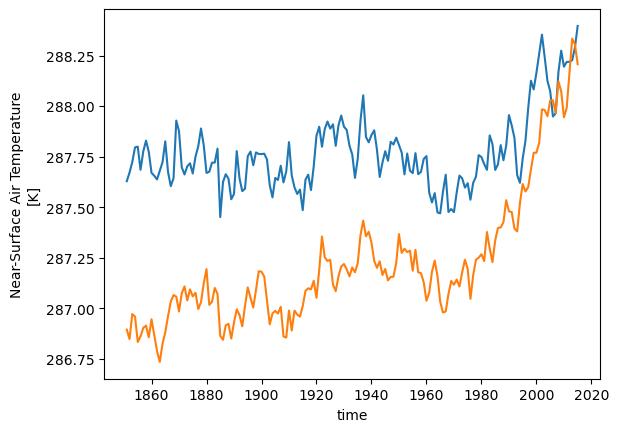

In [66]:
ds_noresm_mean['tas'].resample(time='YE').mean().mean('member_id').plot()
ds_cesm_mean['tas'].resample(time='YE').mean().mean('member_id').plot()


# Task 3c: Ensemble members and internal variability
In this task, you will use theinitial-condition ensemble members to separate
differences between models from differences due to internal climate variability.

Use the annual mean and 30-year running mean global mean temperature calculated in in Task 3b, but this time **do not** average over `member_id`.

**Plotting:** 
- For **each model** (CESM and NorESM), plot the time series from all three ensemble members.
- Each ensemble member should appear as a separate line (e.g. using `ds.sel(member_id='r1i1p1f1')`).
- Choose a plotting style (colors, line types, separate or combined figures) that makes the comparison between models and ensemble members clear.


**Questions:**
- How large is the difference between CESM and NorESM compared to the spread between ensemble members within each model?
- What does the ensemble spread tell you about internal climate variability?
- How does having multiple ensemble members help when interpreting long-term climate trends? What kind of uncertainty can it help us quantify?

Answer in 4–6 sentences, referring explicitly to your plots.



# Task 3d: Compare to observations

### Temperature records: HadCRUT5 

In this task, you will analyze observed surface temperature data from HadCRUT5 and compare it to the CMIP6 model simulations.

HadCRUT5 temperatures are provided as anomalies relative to the 1961–1990 mean.

Before proceeding, visit the following page and read the FAQ:
- https://crudata.uea.ac.uk/cru/data/temperature


**Calculate and plot:**
Using the HadCRUT5 data:
1. Calculate the area-weighted global mean temperature anomaly, using the same function as above as for the model data.
2. Calculate and plot:
   - annual mean temperature anomalies,
   - 30-year running mean temperature anomalies.
3. For each model, calculate the **global mean temperature anomaly** for each model  
   (using the same reference period as HadCRUT5). Finlly average over the ensemble members. 
   - (It's easiest to use the then the annual global mean temperature that you have already calculated, average over the ensemble members and finally calculate the anomaly).
4. Plot the observations (HadCRUT5) and the modelled temperature anomalies calcuated above in the same plot. You should have 3 curves in the same plot. 

**Questions**
- Why are the HadCRUT5 temperatures expressed as anomalies relative to the 1961–1990 period rather than as absolute temperatures?
- How well do the models reproduce the observed temperature evolution?
- Are there systematic differences between models and observations?
- Why do climate models typically reproduce temperature anomalies more accurately than absolute temperatures?

4-7 sentences. 

# Task 3d: Spatial patterns of warming (optional: Extra points)

In this final task, you will analyze the geographical patterns of temperature change in climate models and observations.

For guidance on plotting data on maps, see:
[x_plotting_with_maps.ipynb](x_plotting_with_maps.ipynb)


**Calculations and plotting:**
For CESM and NorESM:
1. Calculate the mean surface temperature for:
   - the early period **1850–1900**, and
   - the late period **1984–2014**.
2. Compute the difference between the two periods (late minus early).
3. Average over ensemble members.
4. Plot the temperature difference on a **global map**.

For HadCRUT5, repeat the steps above, except for step 3 (averaging over ensemble members). 



**Questions:**
- What are the main spatial features of the warming pattern in the models?
- Where is warming strongest, and where is it weakest?
- How do the two models differ in their spatial warming patterns?
- How do the observed warming patterns compare to the models?

Answer in 4–6 sentences, referring explicitly to your maps.


In [72]:
import cartopy

import cartopy.crs as ccrs